In [30]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import ultraplot as plot 
import seaborn as sns
import colorcet as cc

import uproot
import mplhep as hep
import hist
import hist.intervals
import hist.plot

plot.rc['figure.facecolor'] = 'none'
plot.rc['savefig.facecolor'] = 'none'
plot.rc['legend.frameon'] = False
plot.rc['axes.autolimit_mode'] = 'data'

plot.rc['label.size'] = 11
plot.rc['font.size'] = 11

In [97]:
data = uproot.open('huntingMichels.root:michels')

nominal = data['nominal'].arrays(library='pd')
# cheated = data['cheated'].arrays(library='pd')
onlyMva = data['onlyMva'].arrays(library='pd')

nominal = nominal[nominal.completeness > 0.6]
onlyMva = onlyMva[onlyMva.completeness > 0.6]

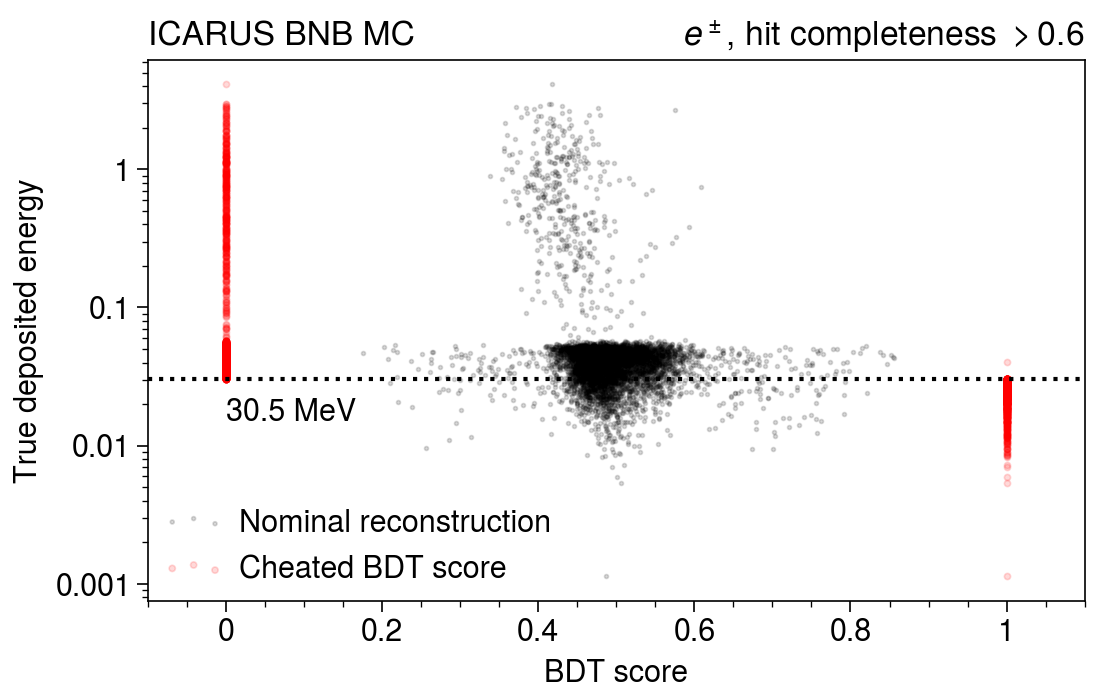

In [98]:
fig, ax = plot.subplots(xlabel=f'BDT score', ylabel=f'True deposited energy', width=5.5, height=3.5, ltitle='ICARUS BNB MC', rtitle='$e^\\pm$, hit completeness $> 0.6$')

ax.scatter(nominal.score, nominal.E, s=2, c='k', alpha=0.15, label='Nominal reconstruction')
# ax.scatter(cheated.score, cheated.E, s=0.05, c='r')
ax.scatter(onlyMva.score, onlyMva.E, s=5, marker='o', c='r', alpha=0.15, label='Cheated BDT score')
ax.axhline(0.0305, ls=':', c='k')
ax.text(0.0, .015, '30.5 MeV')
ax.format(xlim=(-0.1, 1.1), yscale='log', grid=False)

ax.legend(scatterpoints=3, ncols=1)

In [18]:
nominal[nominal.E < 30.5e-3]

,E,score,Run,Subrun,Evt
7,0.030497,0.527885,1,0,312391
8,0.026618,0.502899,1,0,312393
10,0.026067,0.605274,1,0,312401
15,0.022285,0.490677,1,0,1871
17,0.026497,0.455179,1,0,1891
...,...,...,...,...,...
10340,0.020882,0.518349,1,0,71502
10349,0.024626,0.496107,1,0,402091
10353,0.026948,0.544084,1,0,15354
10354,0.023115,0.478689,1,0,15373


In [19]:
nominal[nominal.Evt == 1871]

,E,score,Run,Subrun,Evt
15,0.022285,0.490677,1,0,1871


In [83]:
onlyMva[(onlyMva.score == 1) & (onlyMva.E < 0.0305) & (onlyMva.E < 0.0205)]

,E,score,completeness,purity,Run,Subrun,Evt
79,0.018005,1.0,0.854167,0.891304,1,0,460544
85,0.008922,1.0,0.823529,0.933333,1,0,1542
113,0.017150,1.0,1.000000,0.939394,1,0,2610
119,0.018898,1.0,0.743590,0.659091,1,0,4629
145,0.017792,1.0,0.909091,0.833333,1,0,253654
...,...,...,...,...,...,...,...
10151,0.019334,1.0,0.743590,0.659091,1,0,323388
10167,0.014865,1.0,1.000000,1.000000,1,0,13535
10177,0.008460,1.0,1.000000,0.727273,1,0,461921
10207,0.019948,1.0,0.976744,0.792453,1,0,303311
